In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
714,715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0,NaN,S
782,783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0,D6,S
752,753,0,3,"Vande Velde, Mr. Johannes Joseph",male,33.0,0,0,345780,9.5,NaN,S
539,540,1,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.5,B39,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S


In [4]:
train.shape

(891, 12)

In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.drop(columns=['Cabin','Ticket','Name'], inplace=True)

In [7]:
train.dropna(subset=['Embarked'], inplace=True)

## Data Visualisation

### Gender vs Survival

<Axes: xlabel='Sex', ylabel='Survived'>

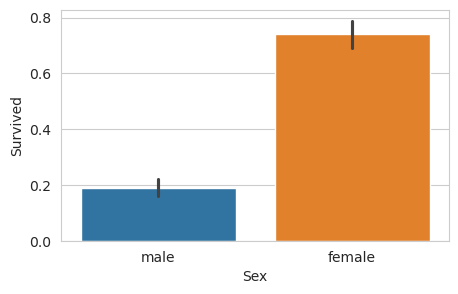

In [8]:
plt.figure(figsize=(5, 3))
sns.set_style('whitegrid')
sns.barplot(x='Sex', y='Survived', data=train, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

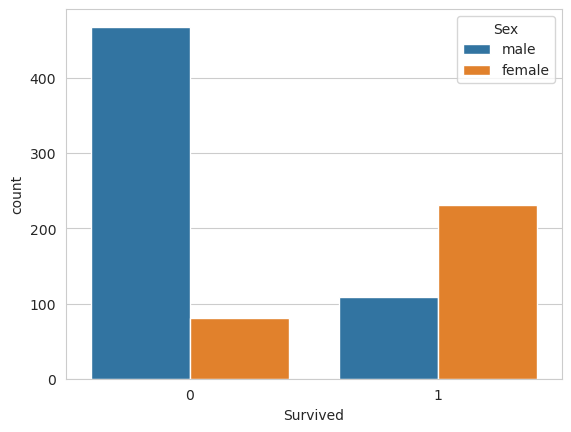

In [9]:
sns.countplot(x='Survived', hue='Sex', data=train)

### Pclass vs Survival

<Axes: xlabel='Pclass', ylabel='Survived'>

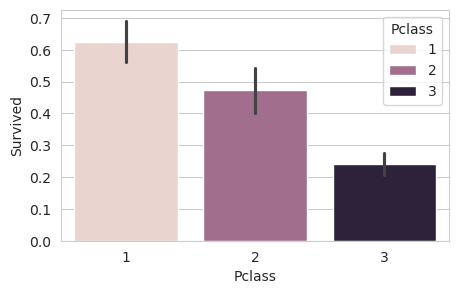

In [10]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Pclass', y='Survived', data=train, hue='Pclass')

<Axes: xlabel='Survived', ylabel='count'>

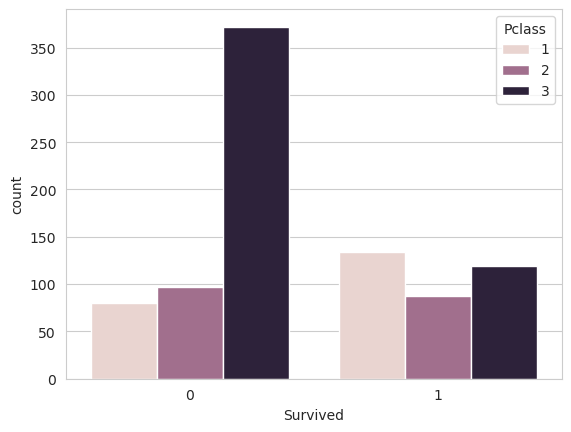

In [11]:
sns.countplot(x='Survived', hue='Pclass', data=train)

### Age vs Survival class-wise.

<Axes: >

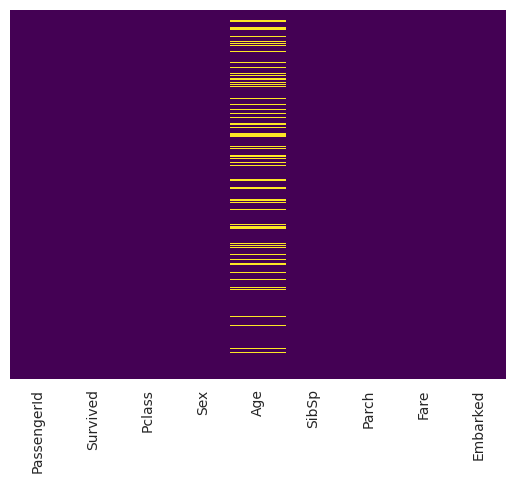

In [12]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Pclass', ylabel='Age'>

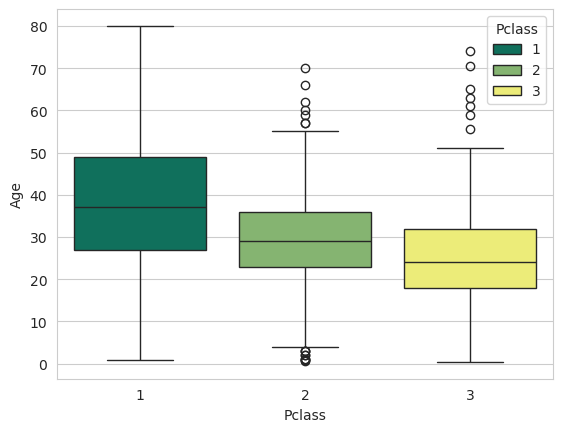

In [13]:
sns.boxplot(x='Pclass', y='Age',hue='Pclass', data=train, palette='summer')

### Dealing with missing value of Age

#### solution: we will create a new column 'Initials' that will contain [Mr. , Miss. , Mrs. , ets.] the we will check if
#### they have unknown value we will replace the age with mode of the 'AgeGroup' and will remove 'Age' in last. 

### 1. Simply replaceing with mean value of each class.

In [14]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]

    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age


In [15]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

/tmp/ipykernel_31149/3295670682.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age=cols[0]
/tmp/ipykernel_31149/3295670682.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass=cols[1]


<Axes: >

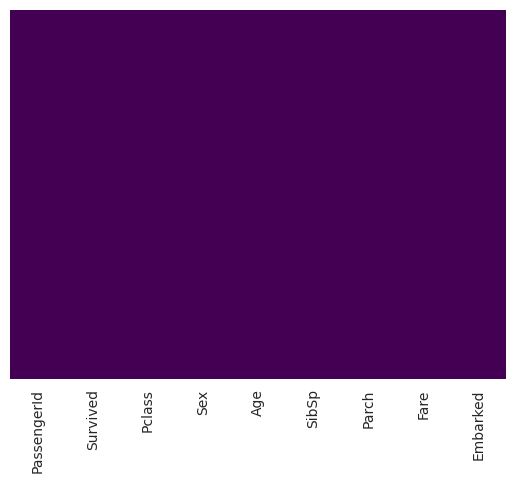

In [16]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [17]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [18]:
train['male'] = train['Sex'].map({'male': 1, 'female': 0})
train=train.drop('Sex',axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,1,0,3,22.0,1,0,7.2500,S,1
1,2,1,1,38.0,1,0,71.2833,C,0
2,3,1,3,26.0,0,0,7.9250,S,0
3,4,1,1,35.0,1,0,53.1000,S,0
4,5,0,3,35.0,0,0,8.0500,S,1


### 2. Feature engineering invluding age group and Pclass

In [19]:
#train.Age = train.Age.fillna(-0.5)

In [20]:
#bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
#labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior', 'Senior+']
#train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels)
#test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels)

In [21]:
#train.head()

In [22]:
#sns.barplot(x='AgeGroup', y='Survived', data=train, hue='AgeGroup')
#plt.show()

## Modelling

In [23]:
train['Embarked'] = train['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

#### Logistic Regression

In [24]:
x_train,x_test,y_train,y_test= train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30, random_state=37)

In [25]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

/home/ujjwal/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred=log_reg.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7865168539325843

#### Random Forest

In [27]:
rf = RandomForestClassifier(n_estimators=500, random_state=37)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=37)

In [28]:
y_pred=rf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8352059925093633

#### Support Vector Machine

In [39]:
model = SVC(kernel='linear', C=3)
model.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [40]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8089887640449438

#### Applying hyperparameter tuning on SVC

In [36]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf']
}
grid_search = GridSearchCV(SVC(), param_grid, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)

In [37]:
best_model

SVC(C=1, kernel='linear')

In [38]:
test_accuracy

0.8089887640449438

In [ ]:
## RESULT: HIGHEST ACCURACY FOR RANDOMfOREST WITH ACCURACY_SCORE = 83.53%